set up

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
np.random.seed(seed=1234)

load data

In [4]:
# Read from CSV to Pandas DataFrame
url = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
df = pd.read_csv(url, header=0)

In [5]:
# first few items
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


- class: class of travel
- name: full name of the passenger
- sex: gender
- age: numerical age
- sibsp: # of siblings/spouse aboard
- parch: number of parents/child aboard
- ticket: ticket number
- fare: cost of the ticket
- cabin: location of room
- embarked: port that the passenger embarked at
- survived: survival metric (0 - died, 1 - survived)

Exploratory Data Analysis

In [20]:
df.dtypes

survived                int64
sex                    object
age                   float64
n_siblings_spouses      int64
parch                   int64
fare                  float64
class                  object
deck                   object
embark_town            object
alone                  object
dtype: object

In [6]:
df.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [12]:
continuous_features = df.describe().columns

In [16]:
df[continuous_features].dtypes

survived                int64
age                   float64
n_siblings_spouses      int64
parch                   int64
fare                  float64
dtype: object

In [7]:
# continues features
df.describe().columns

Index(['survived', 'age', 'n_siblings_spouses', 'parch', 'fare'], dtype='object')

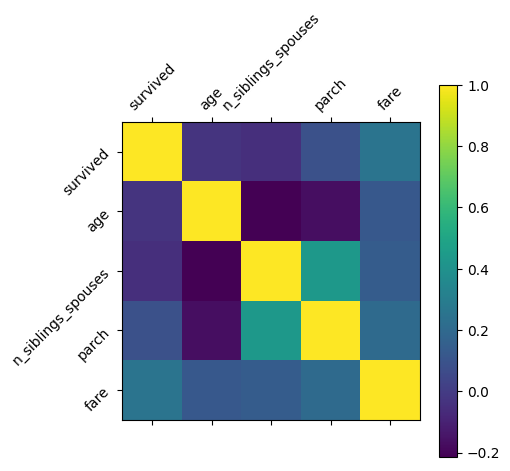

In [21]:
# Correlation matrix
plt.matshow(df[continuous_features].corr())
continuous_features = df.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation=45)
plt.yticks(range(len(continuous_features)), continuous_features, rotation=45)
plt.colorbar()
plt.show()

In [28]:
age = 'age'
df[age]

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64

<Axes: >

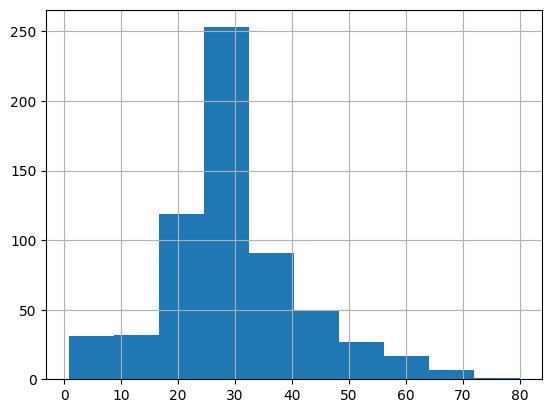

In [22]:
# Histogram
df['age'].hist()

In [24]:
# Unique values
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

Filtering

In [35]:
# selecting data by feature
df['class'].head()

0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: object

In [37]:
df.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [40]:
# filtering
df[df['sex']=="female"].head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,female,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,female,28.0,0,0,8.4583,Third,unknown,Queenstown,y


Sorting

In [42]:
# Sorting in decending order
df.sort_values('age', ascending=False).head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
449,1,female,80.0,0,0,30.0000,First,A,Southampton,y
74,0,female,71.0,0,0,34.6542,First,A,Cherbourg,y
356,0,female,71.0,0,0,49.5042,First,unknown,Cherbourg,y
91,0,female,70.5,0,0,7.7500,Third,unknown,Queenstown,y
527,0,female,70.0,1,1,71.0000,First,B,Southampton,n


Grouping

In [53]:
# Group acrosd features and get averages
df[continuous_features].groupby('survived').mean()

,age,n_siblings_spouses,parch,fare
survived,,,,
0,29.960938,0.591146,0.325521,23.428448
1,29.110412,0.473251,0.465021,51.700086


Indexing

In [59]:
# Selecting row 0
df.iloc[0, :]

survived                        0
sex                        female
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object

In [60]:
# Selecting a specific value
df.iloc[0, 1]

'female'

Preprocessing

In [64]:
# Rows with atleast one NaN value
df[pd.isnull(df).any(axis=1)]

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone


In [66]:
# Drop rows with nan values
df = df.dropna()
df = df.reset_index()
df.head()

,index,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,0,female,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,4,0,female,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [67]:
# Droping multiple columns 
# df.drop(['age'], ['sex'], axis=1)

In [69]:
# Map feature values
df['sex'] = df['sex'].map({"female": 0, "male": 1}).astype(int)


0      0
1      0
2      0
3      0
4      0
      ..
622    0
623    0
624    0
625    0
626    0
Name: sex, Length: 627, dtype: int64

Feature engineering

In [70]:
# Lambda expression to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size
# df[['sibsp', 'parch']].apply(lambda x: get_family_size(x['sibsp'], x['parch']), axis=1)

In [71]:
# Reorganize headers
# df = df[["pclass", "sex", "age", "sibsp", "parch", "family_size", "fare", "mbarked", "survived"]]
# df.head()

Save data

In [72]:
# Saving dataframe to csv
df.to_csv('../datasets/preprossed_titanic.csv', index=False)

In [73]:
# See the saved file
!ls -l

total 0
-rw-rw-r-- 1 alphonse alphonse 0 Nov  7 15:20 tut.ipynb


### Scaling
When working with very large datasets, our Pandas DataFrames can become very large and it can be very slow or impossible to operate on them. This is where packages that can distribute workloads or run on more efficient hardware can come in handy.

- Dask: parallel computing to scale packages like Numpy, Pandas and scikit-learn on one/multiple machines.
- cuDF: efficient dataframe loading and computation on a GPU.
And, of course, we can combine these together (Dask-cuDF) to operate on partitions of a dataframe on the GPU.